In [5]:
import pandas as pd

df = pd.read_csv('data/cib_results.csv')

In [6]:
df

,Name,eval/lrml_f_score.max,eval/bleu.max,train/global_step,learning_rate,_n_gpu,metric_for_best_model,dataloader_drop_last,output_hidden_states,ID,...,test/prediction,test/runtime,test/steps_per_second,test/brevity_penalty,test/lrml_precision,test/reference_length,test/loss,test/samples_per_second,test/translation_length,test/precisions
0,bart-base-lrml-b16_0.0001_beam3_hyper_42,31.309025,0.401925,630.0,0.00010,1,lrml_f_score,False,False,eo7j7h0b,...,NaN,29.5309,0.135,0.816222,32.745853,7056.0,0.244162,2.066,5865.0,"[0.7512361466325661,0.5823569951757409,0.42103..."
1,bart-base-lrml-b16_0.0001_beam1_hyper_42,29.281840,0.435836,630.0,0.00010,1,lrml_f_score,False,False,1eunupwv,...,NaN,10.5483,0.379,1.000000,26.057372,7056.0,0.244162,5.783,8332.0,"[0.614258281325012,0.484463789142788,0.3552984..."
2,bart-base-lrml-b12_0.0001_beam3_hyper_42,31.528788,0.390856,690.0,0.00010,1,lrml_f_score,False,False,2gbjazgj,...,NaN,21.5774,0.278,0.637969,33.391061,7056.0,0.243278,2.827,4868.0,"[0.7777321281840591,0.6168088204701477,0.45111..."
3,bart-base-lrml-b12_0.0001_beam1_hyper_42,28.187328,0.459583,782.0,0.00010,1,lrml_f_score,False,False,84bl7amo,...,NaN,8.6016,0.698,0.896185,28.649956,7056.0,0.246936,7.092,6359.0,"[0.73344865544897,0.5695458875833598,0.4184704..."
4,bart-base-lrml-b8_0.0001_beam3_hyper_42,29.687087,0.377728,759.0,0.00010,1,lrml_f_score,False,False,2llbbxfj,...,NaN,18.3205,0.437,0.560330,32.810608,7056.0,0.233094,3.330,4468.0,"[0.7482094897045658,0.5988200589970502,0.44155..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,bart-large-lrml-b4_4e-05_beam3_hyper_42,31.915902,0.431405,1644.0,0.00004,1,lrml_f_score,False,False,njfdpcd0,...,"if(expr(fun(is),atom(rel(construction),var(chi...",49.3464,0.324,0.869282,31.760968,7056.0,0.222526,1.236,6189.0,"[0.6959121021166585,0.54161227154047,0.3939343..."
322,bart-large-lrml-b4_4e-05_beam1_hyper_42,33.390235,0.432464,1370.0,0.00004,1,lrml_f_score,False,False,119zyb2i,...,"if(expr(fun(is),atom(rel(construction),var(chi...",20.1870,0.793,0.640247,36.398206,7056.0,0.205849,3.022,4880.0,"[0.7317622950819672,0.574393027599087,0.420134..."
323,t5-large-lrml-b4_0.0001_beam1_hyper_42,37.689449,0.520999,2740.0,0.00010,1,lrml_f_score,False,False,ctih0bqp,...,"if(and(expr(fun(is),atom(rel(construction),var...",84.6496,0.189,1.000000,36.209743,6765.0,0.290326,0.721,7174.0,"[0.6879007527181489,0.5734570504709686,0.45079..."
324,t5-amr-lrml-b4_0.0001_beam1_hyper_42,34.913510,0.453655,2329.0,0.00010,1,lrml_f_score,False,False,2f0jva0a,...,"if(expr(fun(is),atom(rel(material),var(chimney...",63.2909,0.253,1.000000,34.253050,6765.0,0.226446,0.964,8082.0,"[0.6347438752783965,0.5256202468520135,0.40829..."


In [82]:
import re

# Function to parse the name
def parse_name(name):
    model_name = re.search(r'^([^-]+-[^-]+)', name).group(1)
    batch_size = re.search(r'b(\d+)_', name).group(1)
    learning_rate = re.search(r'_([0-9.e-]+)_beam', name).group(1)
    beam_size = re.search(r'beam(\d+)_hyper', name).group(1)

    return model_name, int(batch_size), float(learning_rate), int(beam_size)

# Apply the function to the 'Name' column
df[['model_name', 'batch_size', 'learning_rate', 'beam_size']] = df['Name'].apply(
    lambda x: pd.Series(parse_name(x))
)

# Rename columns
df.rename(columns={'eval/lrml_f_score.max': 'f1_score', 'eval/bleu.max': 'bleu'}, inplace=True)

df


,Name,f1_score,bleu,train/global_step,learning_rate,_n_gpu,metric_for_best_model,dataloader_drop_last,output_hidden_states,ID,...,test/brevity_penalty,test/lrml_precision,test/reference_length,test/loss,test/samples_per_second,test/translation_length,test/precisions,model_name,batch_size,beam_size
14,bart-base-lrml-b16_0.0001_beam3_hyper_42,31.309025,0.401925,630.0,0.00010,1,lrml_f_score,False,False,eo7j7h0b,...,0.816222,32.745853,7056.0,0.244162,2.066,5865.0,"[0.7512361466325661,0.5823569951757409,0.42103...",bart-base,16,3
16,bart-base-lrml-b16_0.0001_beam1_hyper_42,29.281840,0.435836,630.0,0.00010,1,lrml_f_score,False,False,1eunupwv,...,1.000000,26.057372,7056.0,0.244162,5.783,8332.0,"[0.614258281325012,0.484463789142788,0.3552984...",bart-base,16,1
18,bart-base-lrml-b12_0.0001_beam3_hyper_42,31.528788,0.390856,690.0,0.00010,1,lrml_f_score,False,False,2gbjazgj,...,0.637969,33.391061,7056.0,0.243278,2.827,4868.0,"[0.7777321281840591,0.6168088204701477,0.45111...",bart-base,12,3
19,bart-base-lrml-b12_0.0001_beam1_hyper_42,28.187328,0.459583,782.0,0.00010,1,lrml_f_score,False,False,84bl7amo,...,0.896185,28.649956,7056.0,0.246936,7.092,6359.0,"[0.73344865544897,0.5695458875833598,0.4184704...",bart-base,12,1
20,bart-base-lrml-b8_0.0001_beam3_hyper_42,29.687087,0.377728,759.0,0.00010,1,lrml_f_score,False,False,2llbbxfj,...,0.560330,32.810608,7056.0,0.233094,3.330,4468.0,"[0.7482094897045658,0.5988200589970502,0.44155...",bart-base,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,bart-large-lrml-b4_4e-05_beam3_hyper_42,31.915902,0.431405,1644.0,0.00004,1,lrml_f_score,False,False,njfdpcd0,...,0.869282,31.760968,7056.0,0.222526,1.236,6189.0,"[0.6959121021166585,0.54161227154047,0.3939343...",bart-large,4,3
441,bart-large-lrml-b4_4e-05_beam1_hyper_42,33.390235,0.432464,1370.0,0.00004,1,lrml_f_score,False,False,119zyb2i,...,0.640247,36.398206,7056.0,0.205849,3.022,4880.0,"[0.7317622950819672,0.574393027599087,0.420134...",bart-large,4,1
442,t5-large-lrml-b4_0.0001_beam1_hyper_42,37.689449,0.520999,2740.0,0.00010,1,lrml_f_score,False,False,ctih0bqp,...,1.000000,36.209743,6765.0,0.290326,0.721,7174.0,"[0.6879007527181489,0.5734570504709686,0.45079...",t5-large,4,1
443,t5-amr-lrml-b4_0.0001_beam1_hyper_42,34.913510,0.453655,2329.0,0.00010,1,lrml_f_score,False,False,2f0jva0a,...,1.000000,34.253050,6765.0,0.226446,0.964,8082.0,"[0.6347438752783965,0.5256202468520135,0.40829...",t5-amr,4,1


In [83]:
# List of columns to keep
columns_to_keep = ['model_name', 'batch_size', 'learning_rate', 'beam_size', 'f1_score', 'bleu']

# Drop all other columns
df = df[columns_to_keep]

df

,model_name,batch_size,learning_rate,beam_size,f1_score,bleu
14,bart-base,16,0.00010,3,31.309025,0.401925
16,bart-base,16,0.00010,1,29.281840,0.435836
18,bart-base,12,0.00010,3,31.528788,0.390856
19,bart-base,12,0.00010,1,28.187328,0.459583
20,bart-base,8,0.00010,3,29.687087,0.377728
...,...,...,...,...,...,...
440,bart-large,4,0.00004,3,31.915902,0.431405
441,bart-large,4,0.00004,1,33.390235,0.432464
442,t5-large,4,0.00010,1,37.689449,0.520999
443,t5-amr,4,0.00010,1,34.913510,0.453655


In [84]:
df.rename(columns={'f1_score': 'F1-Score', 'learning_rate': 'Learning Rate', 'model_name': 'Model', 'batch_size': 'Batch Size', 'beam_size': 'Beam Size'}, inplace=True)


/var/folders/nh/sj47dvbx7p9dd_l626f7j3700000gn/T/ipykernel_59949/29173221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'f1_score': 'F1-Score', 'learning_rate': 'Learning Rate', 'model_name': 'Model', 'batch_size': 'Batch Size', 'beam_size': 'Beam Size'}, inplace=True)


In [85]:
# Remove additional runs for bart-base
df = df.loc[~((df['Learning Rate'] == 0.00010) & (df['Model'] == 'bart-base'))]

In [25]:
# pip install seaborn

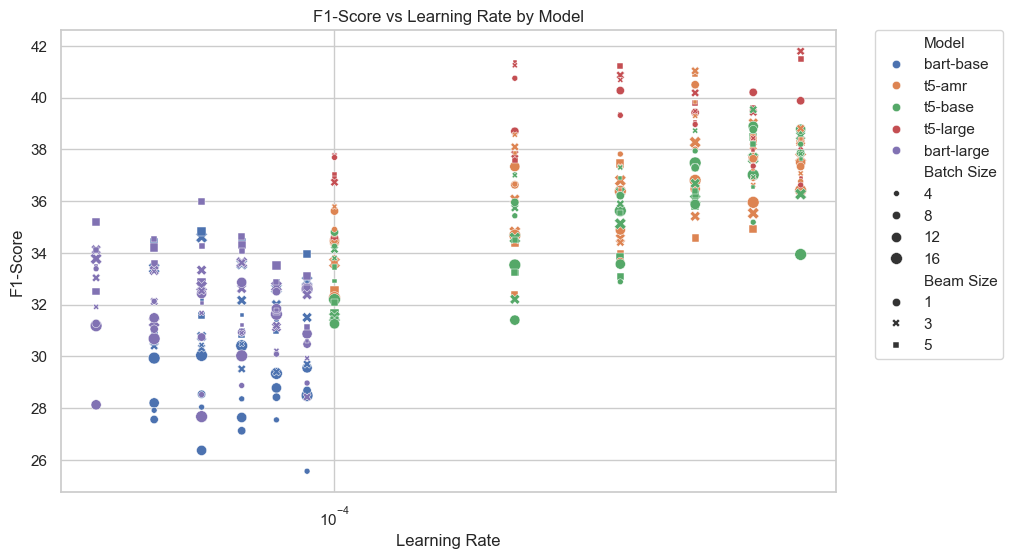

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Learning Rate', y='F1-Score', hue='Model', size='Batch Size', style='Beam Size')
plt.xscale('log')  # if learning_rate varies in orders of magnitude
plt.title('F1-Score vs Learning Rate by Model')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)  # To move the legend out of the plot
plt.show()

/var/folders/nh/sj47dvbx7p9dd_l626f7j3700000gn/T/ipykernel_59949/886973050.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['color'] = df['Model'].map(model_colors)


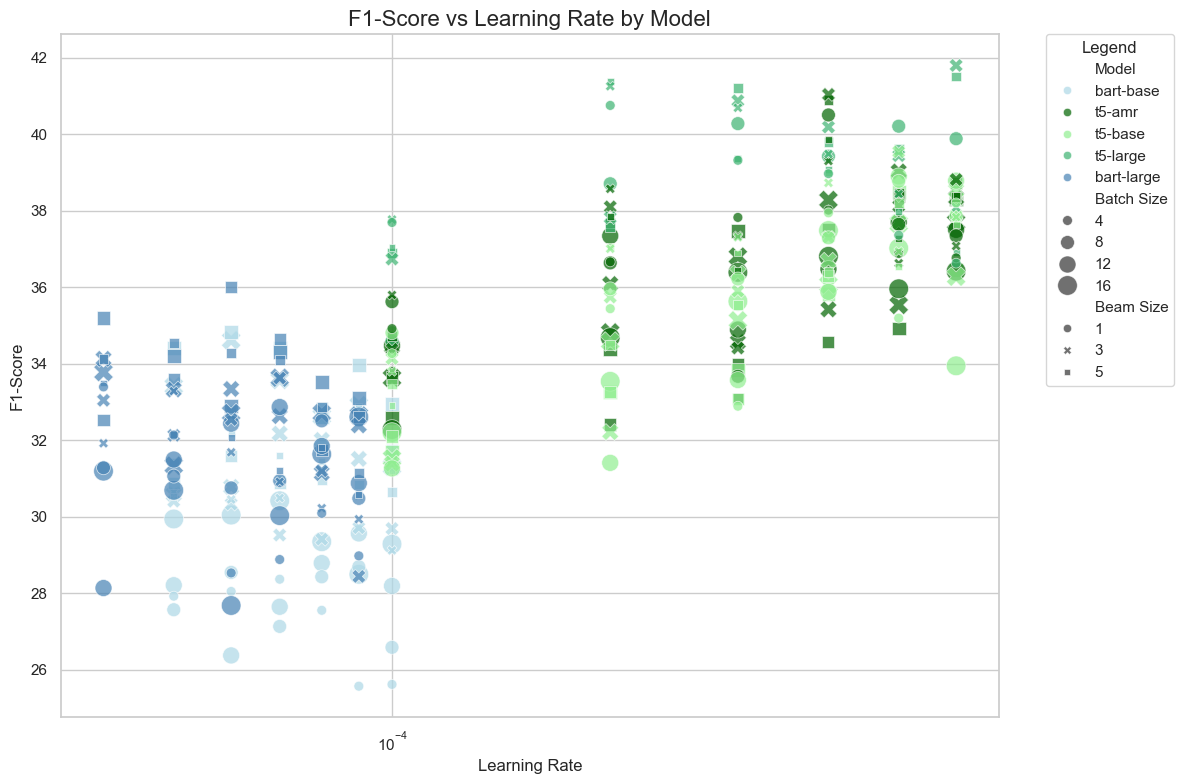

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a custom color palette
# Assuming 'bart' models are shades of blue and 't5' models are shades of green
model_colors = {
    'bart-base': 'lightblue',
    'bart-large': 'steelblue',
    't5-base': 'lightgreen',
    't5-large': 'mediumseagreen',
    't5-amr': 'darkgreen'
    # Add more models and their colors as needed
}

# Map your model names in the DataFrame to these colors
df['color'] = df['Model'].map(model_colors)

# Set a style theme
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(data=df, x='Learning Rate', y='F1-Score', hue='Model',
                          size='Batch Size', style='Beam Size', sizes=(50, 200), palette=model_colors, alpha=0.7)

# Set logarithmic scale for x-axis
plt.xscale('log')

# Enhance the legend
scatter.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Legend')

# Set the titles and labels
plt.title('F1-Score vs Learning Rate by Model', fontsize=16)
plt.xlabel('Learning Rate', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)

# Fine-tune the layout
plt.tight_layout()

# Show the plot
plt.show()


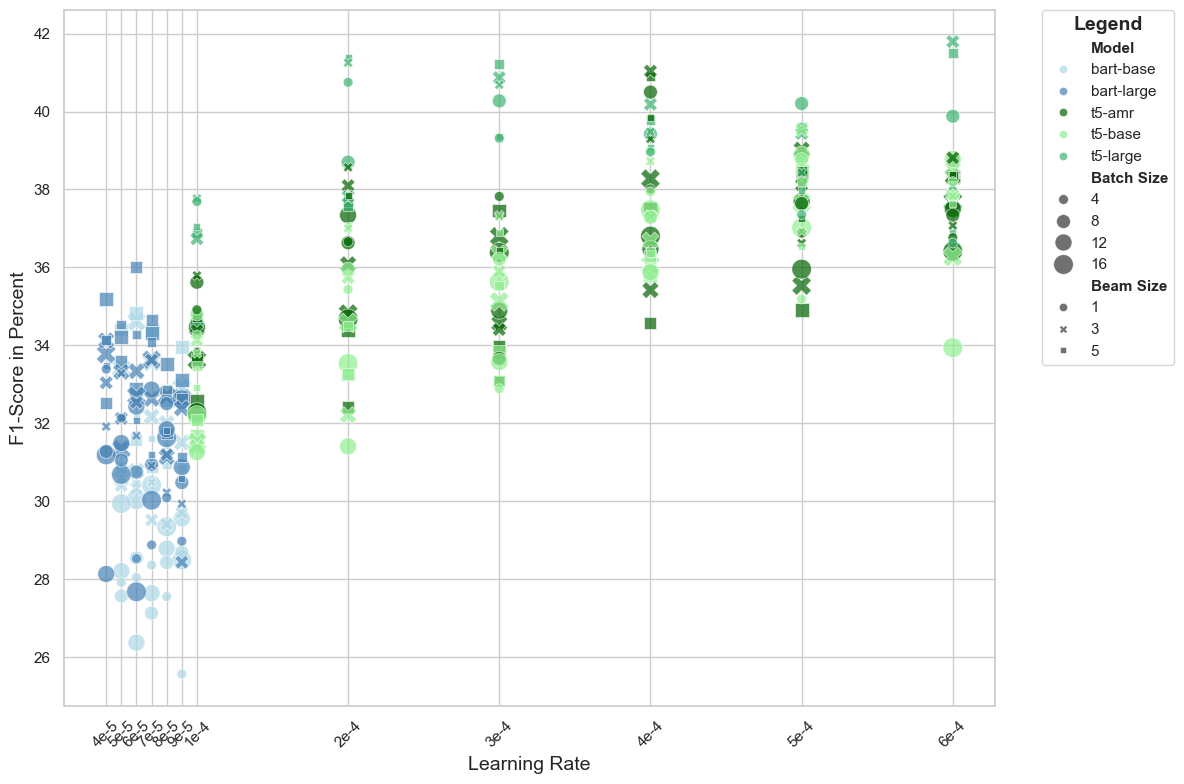

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define a custom color palette
model_colors = {
    'bart-base': 'lightblue',
    'bart-large': 'steelblue',
    't5-base': 'lightgreen',
    't5-large': 'mediumseagreen',
    't5-amr': 'darkgreen'
}

# Set a style theme
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(data=df, x='Learning Rate', y='F1-Score', hue='Model',
                          size='Batch Size', style='Beam Size', sizes=(50, 200), 
                          palette=model_colors, alpha=0.7)

# Set logarithmic scale and ticks for x-axis
# plt.xscale('log')

# ticks = [4e-5, 5e-5, 6e-5, 7e-5, 8e-5, 9e-5, 1e-4, 2e-4, 3e-4, 4e-4, 5e-4, 6e-4]
# labels = ['4e-5', '5e-5', '6e-5', '7e-5', '8e-5', '9e-5', '1e-4', '2e-4', '3e-4', '4e-4', '5e-4', '6e-4']

# plt.xticks(ticks=ticks, labels=labels)
# plt.xticks(rotation=45)

ticks = [4e-5, 5e-5, 6e-5, 7e-5, 8e-5, 9e-5, 1e-4, 2e-4, 3e-4, 4e-4, 5e-4, 6e-4]

# Create bin labels
labels = ['4e-5', '5e-5', '6e-5', '7e-5', '8e-5', '9e-5', '1e-4', '2e-4', '3e-4', '4e-4', '5e-4', '6e-4']

# Set the ticks in the middle of each range for the labels
middle_ticks = [(ticks[i] + ticks[i+1]) / 2 for i in range(len(ticks)-1)]

# Set the custom ticks and labels
plt.xticks(ticks=ticks, labels=labels, rotation=45)


# plt.xticks(ticks=[4e-5, 6e-5, 8e-5, 1e-4, 2e-4, 4e-4, 6e-4], labels=['4e-5', '6e-5', '8e-5', '1e-4', '2e-4', '4e-4', '6e-4'])

# Set the titles and labels
# plt.title('F1-Score vs Learning Rate by Model', fontsize=16)
plt.xlabel('Learning Rate', fontsize=14)
plt.ylabel('F1-Score in Percent', fontsize=14)

# Extract handles and labels for the legend
handles, labels = scatter.get_legend_handles_labels()

item_to_move = labels.pop(5)  # Remove the item at index 4 and store it
labels.insert(2, item_to_move)

item_to_move = handles.pop(5)  # Remove the item at index 4 and store it
handles.insert(2, item_to_move)


# Create custom legend
legend = plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Legend')

# Style the legend
legend.get_title().set_fontsize('14') # Title font size
legend.get_title().set_fontweight('bold')
for i, label in enumerate(legend.get_texts()):
    # print(i)
    if i in [0, 6, 11]:
        # label.set_fontsize('14') # Individual label font size
        # label.set_ha('left')    # Horizontal alignment of the text
        # label.set_va('left')   # Vertical alignment of the text
        # label.set_padding(-10)    # Padding
        # label.set_horizontalalignment('left')
        label.set_fontweight('bold')


# Fine-tune the layout
plt.tight_layout()

# Show the plot
plt.show()


In [77]:
df

,Model,Batch Size,Learning Rate,Beam Size,F1-Score,bleu,Model Group,color
14,bart-base,16,0.00010,3,31.309025,0.401925,bart,lightblue
16,bart-base,16,0.00010,1,29.281840,0.435836,bart,lightblue
18,bart-base,12,0.00010,3,31.528788,0.390856,bart,lightblue
19,bart-base,12,0.00010,1,28.187328,0.459583,bart,lightblue
20,bart-base,8,0.00010,3,29.687087,0.377728,bart,lightblue
...,...,...,...,...,...,...,...,...
440,bart-large,4,0.00004,3,31.915902,0.431405,bart,steelblue
441,bart-large,4,0.00004,1,33.390235,0.432464,bart,steelblue
442,t5-large,4,0.00010,1,37.689449,0.520999,t5,mediumseagreen
443,t5-amr,4,0.00010,1,34.913510,0.453655,t5,darkgreen


In [76]:
df.loc[~((df['Learning Rate'] == 0.00010) & (df['Model'] == 'bart-base'))]

,Model,Batch Size,Learning Rate,Beam Size,F1-Score,bleu,Model Group,color
24,bart-base,16,0.00009,3,32.911101,0.413063,bart,lightblue
25,bart-base,16,0.00009,1,28.490490,0.455844,bart,lightblue
26,bart-base,12,0.00009,3,31.507783,0.409760,bart,lightblue
27,bart-base,12,0.00009,1,29.559642,0.464511,bart,lightblue
28,bart-base,8,0.00009,3,29.707243,0.401091,bart,lightblue
...,...,...,...,...,...,...,...,...
440,bart-large,4,0.00004,3,31.915902,0.431405,bart,steelblue
441,bart-large,4,0.00004,1,33.390235,0.432464,bart,steelblue
442,t5-large,4,0.00010,1,37.689449,0.520999,t5,mediumseagreen
443,t5-amr,4,0.00010,1,34.913510,0.453655,t5,darkgreen


In [44]:
model_handles

In [49]:
handles

In [48]:
labels

['Model',
 'bart-base',
 't5-amr',
 't5-base',
 't5-large',
 'bart-large',
 'Batch Size',
 '4',
 '8',
 '12',
 '16',
 'Beam Size',
 '1',
 '3',
 '5']

In [50]:
item_to_move = labels.pop(5)  # Remove the item at index 4 and store it
labels.insert(2, item_to_move)
labels

['Model',
 'bart-base',
 'bart-large',
 't5-amr',
 't5-base',
 't5-large',
 'Batch Size',
 '4',
 '8',
 '12',
 '16',
 'Beam Size',
 '1',
 '3',
 '5']